## Part I: Exploratory Data Analysis

### Setup Environment

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# mount google drive to load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# set dataset path
dataset_root = '/content/drive/MyDrive/Datasets/sepsis'
dataset_path = dataset_root + '/dataset.csv'

In [4]:
# load the raw dataset
sepsis_df = pd.read_csv(dataset_path)

In [5]:
# inspect
sepsis_df

Unnamed: 0  Hour     HR  O2Sat  Temp    SBP   MAP   DBP  Resp  EtCO2  \
0                 0     0    NaN    NaN   NaN    NaN   NaN   NaN   NaN    NaN   
1                 1     1   65.0  100.0   NaN    NaN  72.0   NaN  16.5    NaN   
2                 2     2   78.0  100.0   NaN    NaN  42.5   NaN   NaN    NaN   
3                 3     3   73.0  100.0   NaN    NaN   NaN   NaN  17.0    NaN   
4                 4     4   70.0  100.0   NaN  129.0  74.0  69.0  14.0    NaN   
...             ...   ...    ...    ...   ...    ...   ...   ...   ...    ...   
1552205          21    21   83.0   99.0   NaN  121.0  77.0  54.0  22.0    NaN   
1552206          22    22   80.0   92.0   NaN  102.0  73.0  51.0  24.0    NaN   
1552207          23    23   95.0   97.0  36.7  128.5  83.0  58.5  25.0    NaN   
1552208          24    24  104.0   99.0   NaN  127.0  85.0  59.0  24.0    NaN   
1552209          25    25   94.5   99.0   NaN  112.0  81.0  56.0  22.0    NaN   

         ...  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  \
0        ...         NaN        NaN  68.54       0    NaN    NaN        -0.02   
1        ...         NaN        NaN  68.54       0    NaN    NaN        -0.02   
2        ...         NaN        NaN  68.54       0    NaN    NaN        -0.02   
3        ...         NaN        NaN  68.54       0    NaN    NaN        -0.02   
4        ...         NaN      330.0  68.54       0    NaN    NaN        -0.02   
...      ...         ...        ...    ...     ...    ...    ...          ...   
1552205  ...         NaN        NaN  88.00       0    1.0    0.0        -2.93   
1552206  ...         NaN        NaN  88.00       0    1.0    0.0        -2.93   
1552207  ...         NaN        NaN  88.00       0    1.0    0.0        -2.93   
1552208  ...         NaN        NaN  88.00       0    1.0    0.0        -2.93   
1552209  ...         NaN        NaN  88.00       0    1.0    0.0        -2.93   

         ICULOS  SepsisLabel  Patient_ID  
0             1            0       17072  
1             2            0       17072  
2             3            0       17072  
3             4            0       17072  
4             5            0       17072  
...         ...          ...         ...  
1552205      22            0      113911  
1552206      23            0      113911  
1552207      24            0      113911  
1552208      25            0      113911  
1552209      26            0      113911  

[1552210 rows x 44 columns]

In [8]:
# get the info
sepsis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [9]:
# extract unique patients
unique_patient_ids = sepsis_df['Patient_ID'].unique()
print(f'Number of unique patients: {len(unique_patient_ids)}')

Number of unique patients: 40336


In [6]:
# helper function to get clinical variables only (plus patient ID)
def get_clinical_variables_df(df):
  return df.iloc[:, np.r_[2:36, 43]]

# helper function to get clinical variables only
def get_clinical_variables_df_with_target(df):
  return df.iloc[:, np.r_[2:36, 42, 43]]

# helper function to get clinical variables only
def get_nonclinical_variables_df_with_target(df):
  return df.iloc[:, 36:]

# helper function to get the clinical variables with
# consistent data (ie: not many NaNs) with base non-clinical features
def get_base_clinical_with_non_clinical(df):
  return df.iloc[:, np.r_[2:9, 36, 37, 42]]

# helper function to get the clinical variables with
# less consistent data (ie: many NaNs) with target.
# additional slice range added due to high number
def get_extended_clinical_with_non_clinical(df, range):
  return df.iloc[:, range]

# helper to extract and plot patient (randomly selected) clinicals
def visualize_clinicals_random_patient(df, patient_id):
  patient_df = df[df['Patient_ID'] == patient_id]
  clinical_patient_df = get_clinical_variables_df(patient_df)

  # plot stacked line
  plt.rcParams["figure.figsize"] = (12,30)
  ax = clinical_patient_df.plot(subplots=True, legend=True, title=f'Clinical data for Patient {patient_id}')[0]
  fig = ax.get_figure()
  fig.tight_layout()
  fig.subplots_adjust(top=0.95)
  plt.show()


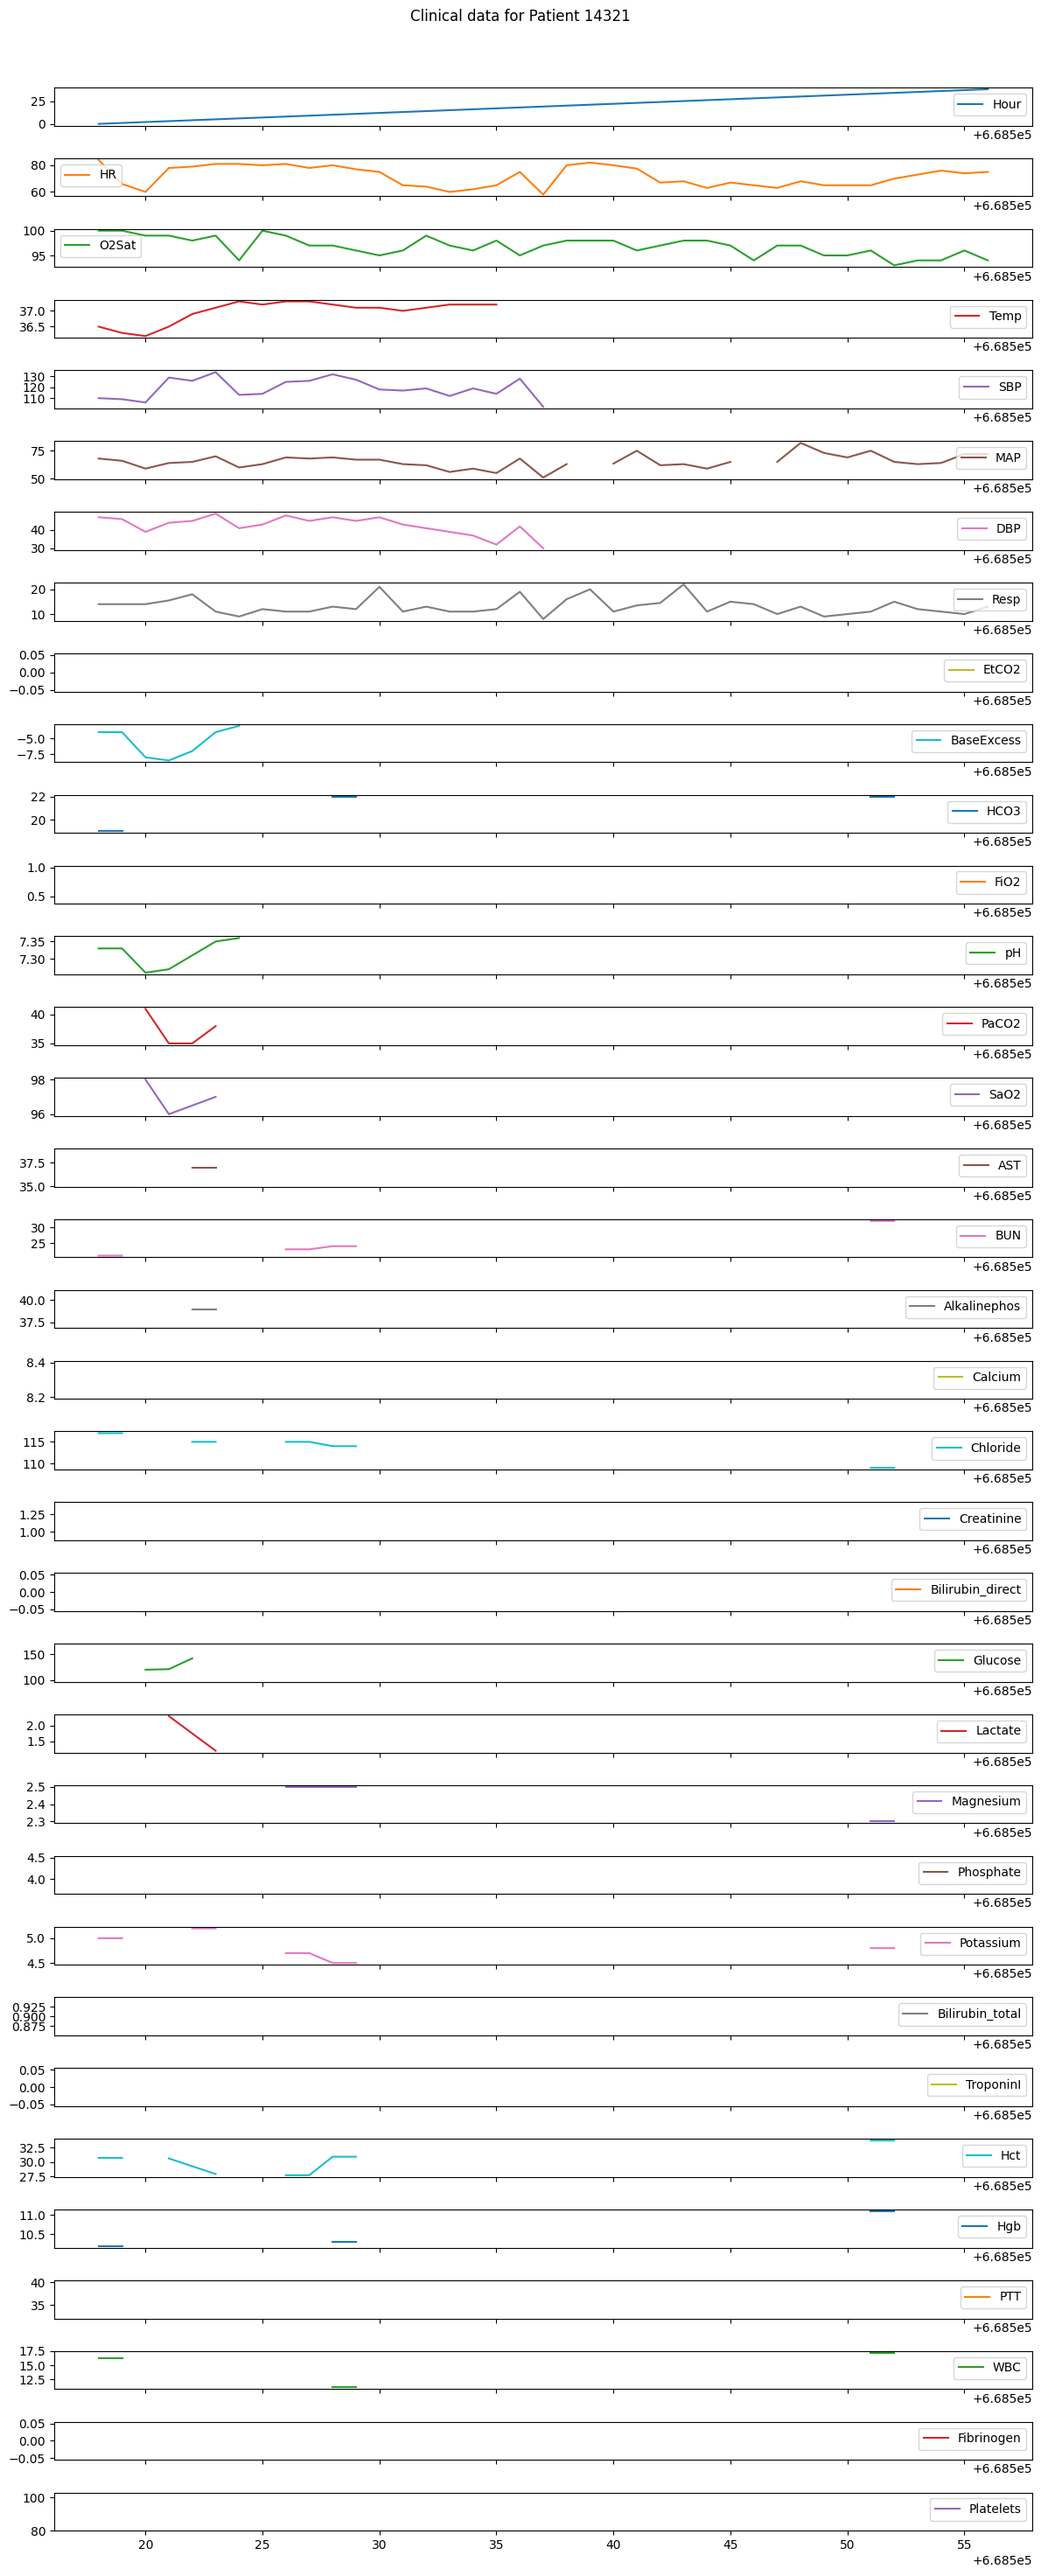

In [41]:
# slice out just the clinical data to visualize
r_patient_id = np.random.choice(unique_patient_ids)
visualize_clinicals_random_patient(sepsis_df, r_patient_id)

### Visualize Distributions of the Clinical Variables
Plot the distributions of each of the clinical variables.  Many of these variables have a large NaN count, so this will help visualize the distributions of these.

In [ ]:
# slice to clinical data only
clinical_df = sepsis_df.iloc[:, 2:36]

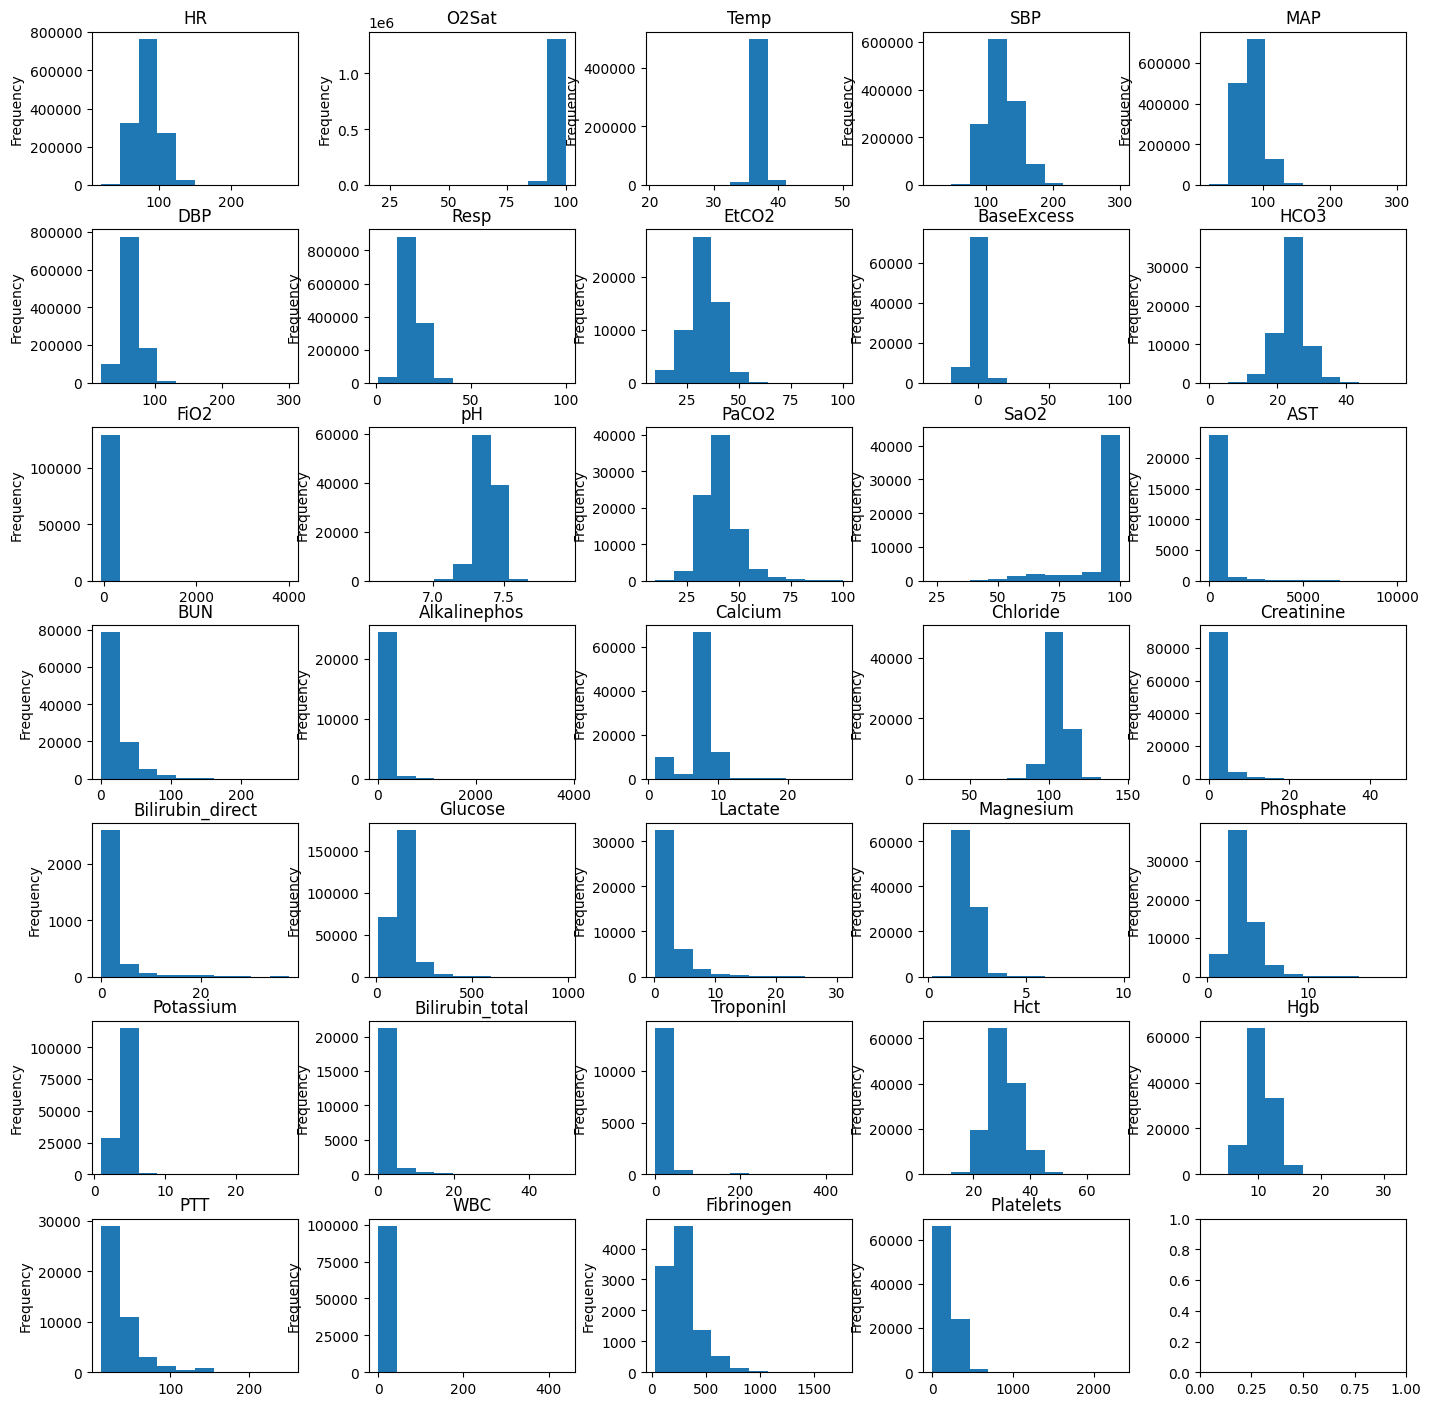

In [47]:
# plot histograms of each clinical variable (across all patients)
plt.rcParams["figure.figsize"] = (14,14)
fig, axs = plt.subplots(7, 5)
fig.tight_layout()
for _,u in enumerate(clinical_df.columns):
    plt.subplot(7,5,_+1)
    clinical_df[u].plot(kind='hist')
    plt.title(u)
plt.show()

### Balances of Classes
We see in the visualizations below that we have significant class imbalances - partiularly with our target varaible.

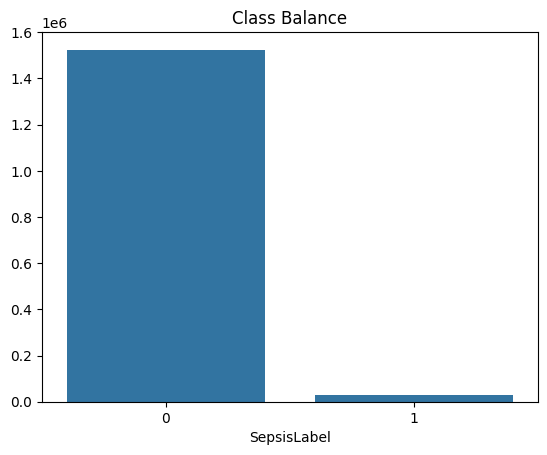

In [52]:
# evaluate the class balance (has sepsis v not)
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
classes = sepsis_df['SepsisLabel'].value_counts()
sns.barplot(x=classes.index, y=classes.values)
plt.title('Class Balance')
plt.show()

### General Correlation between Variables
Evaluate correlation between variables through multiple visualizations including pairplot and correlation matrix.  The full dataset will be used in this case to evaluate potential correlations between variables.

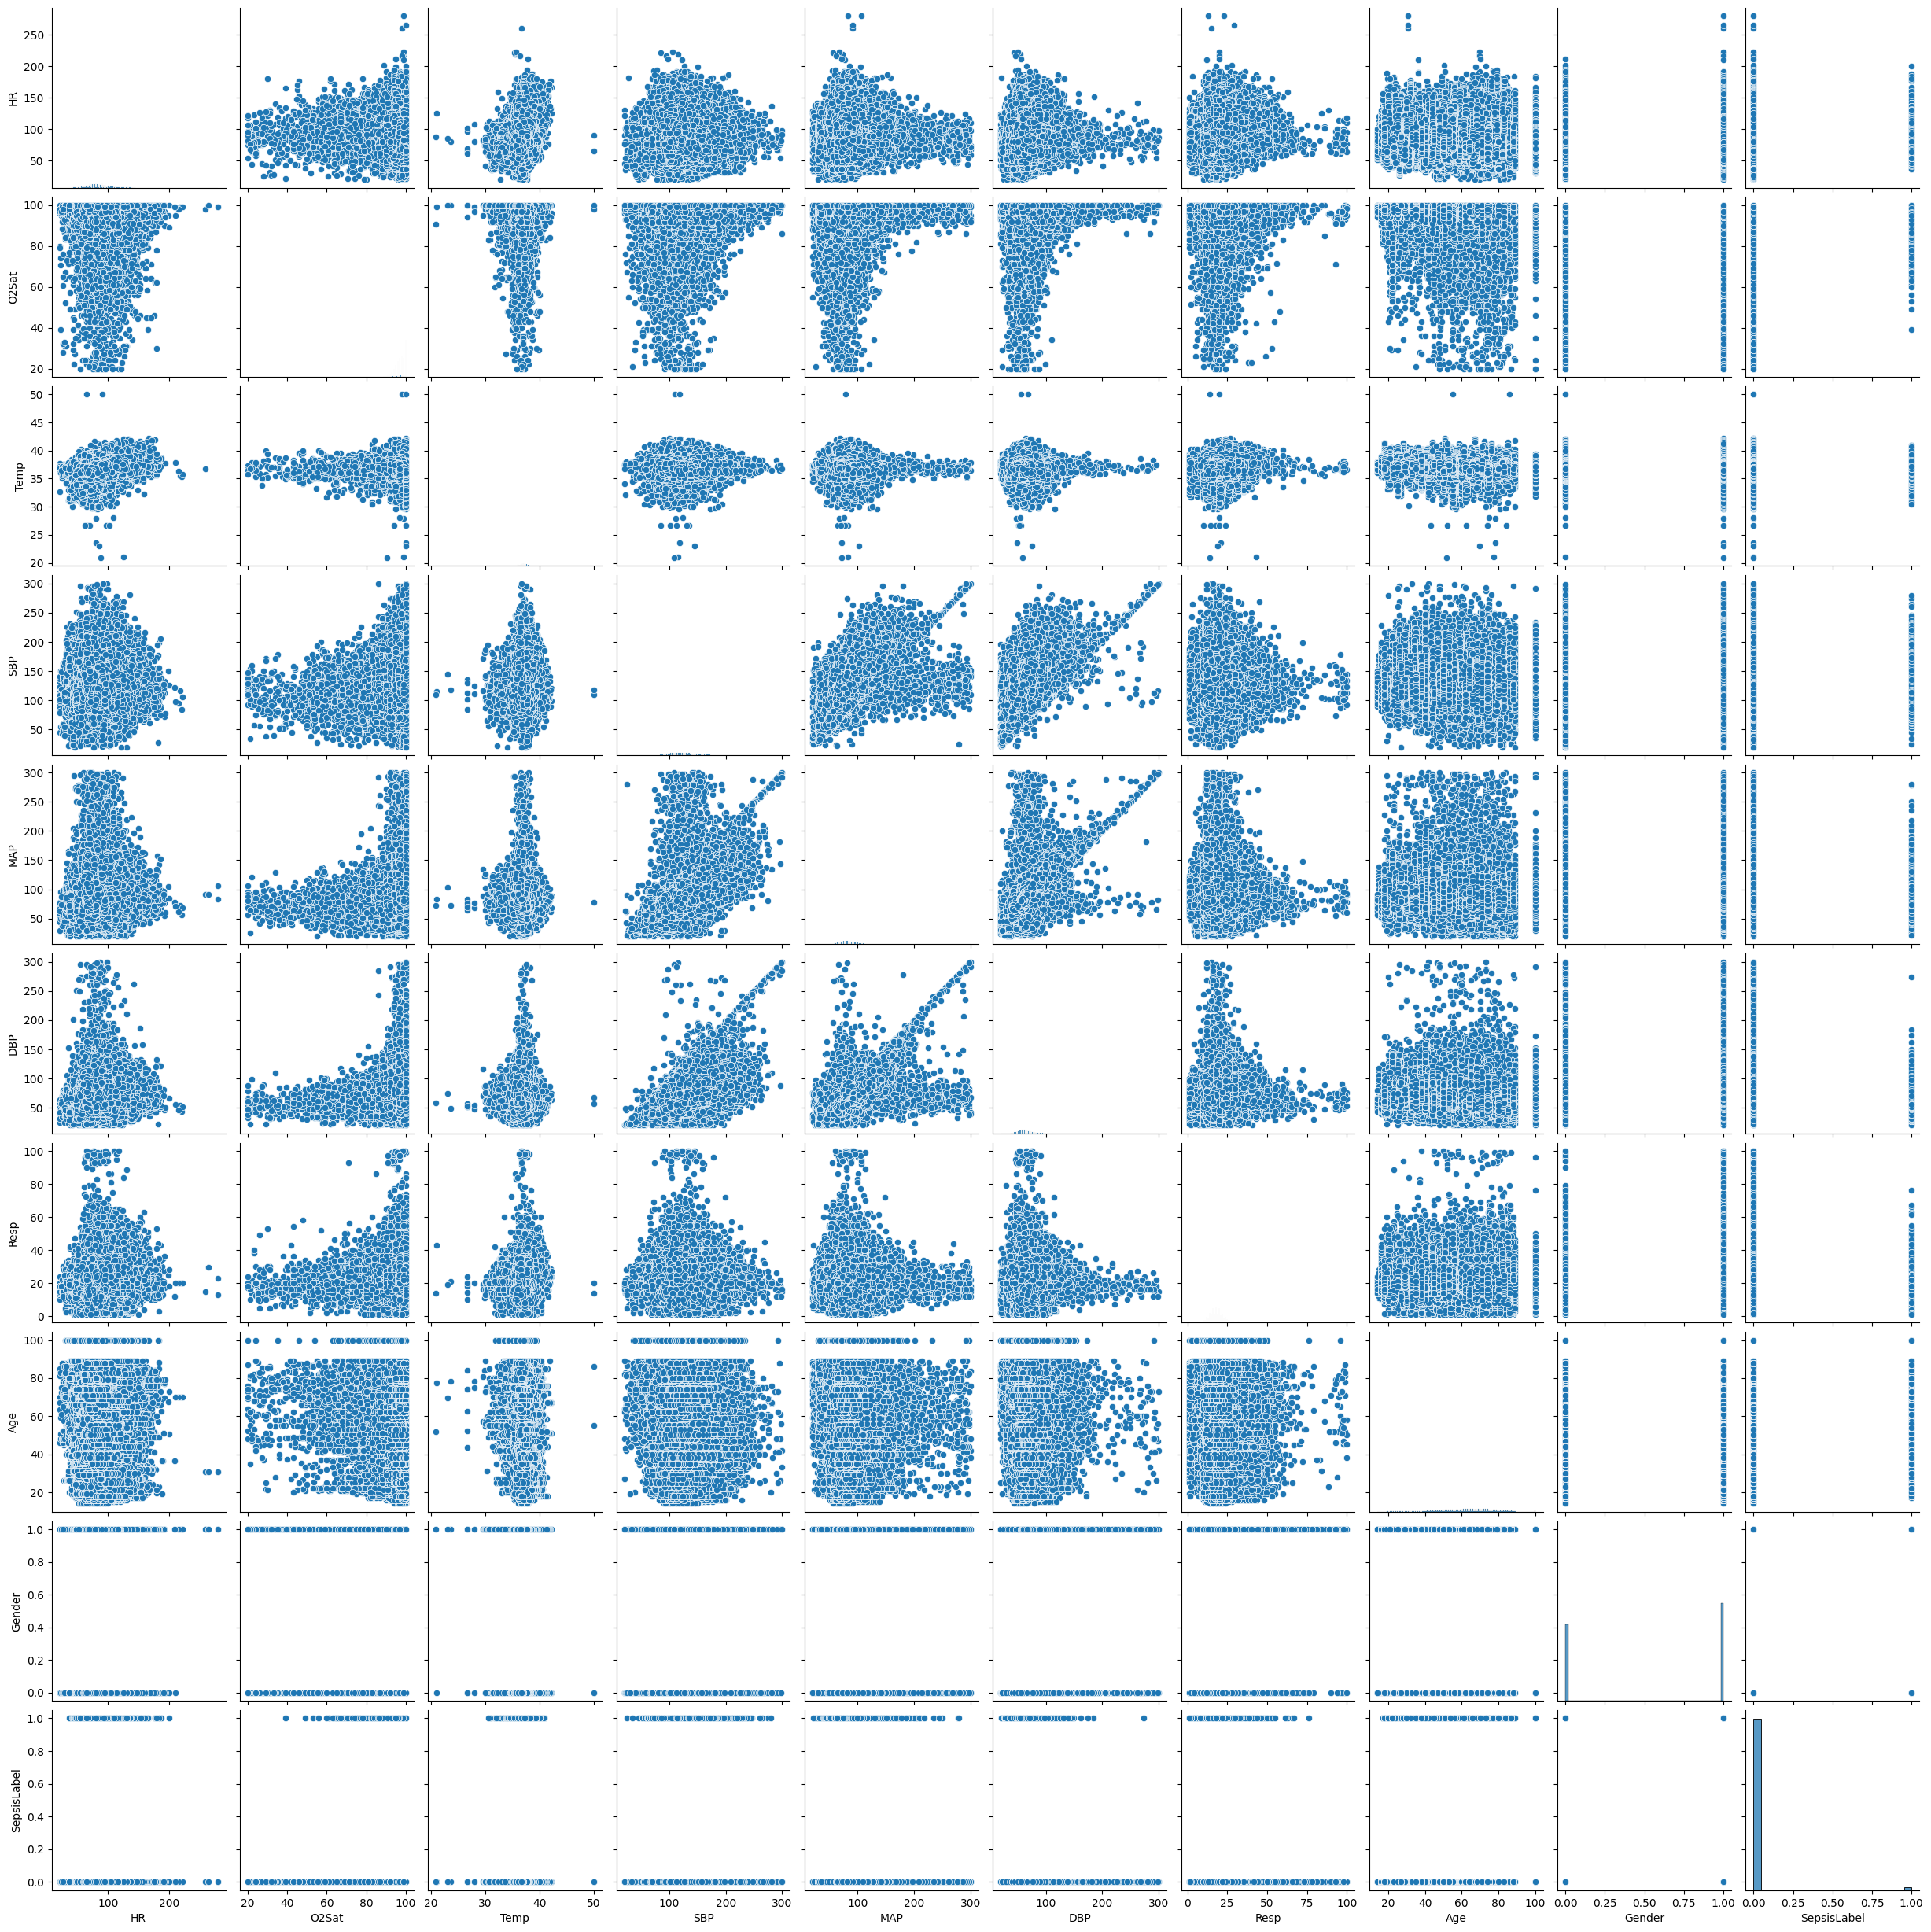

In [16]:
# pair plot base clinical data v. target
base_clinical_df = get_base_clinical_with_non_clinical(sepsis_df)
vars = base_clinical_df.columns
sns.pairplot(base_clinical_df, vars=vars)
plt.show()

### Base Clinical Variables Pairplot Observations

This pairplot visualizes correlations between our base clinical variables (those that have consistent readings) and our non-clinical variabeles against our target.  We are able to observe some correlations between varianbles, and particularly between variables and our target varible.  Here are some of interest:

Correlation of input variables and target:
*   **O2 Sat**: There appears to be some positive correlation between increased O2 Sat and positive sepsis outcome.
*   **Temp**: Ignoring the outliers, there is a correlation between elevated temperature and positive sepsis outcome.
*   **DBP**: There is correlation between lower DBP and positive sepsis outcome.
*   **Resp**: There is weak positive correlation in lower resp values and positive sepsis outcome.
*   **Age**: There does not appear to be a correlation between age and sepsis outcome.

Correlation between input variables:
*   **DBP and SBP**: Observed linear correlation between these two.
*   **DBP and MAP**: Observed linear correlation between these two.
*   **MAP and SBP**: Observed linear correlation between these two.
*   **O2 Sat, DBP and SBP**: Observed correlation between these variables.
*   **Temp O2 Sat, DBP and SBP**: Observed correlation between these variables.




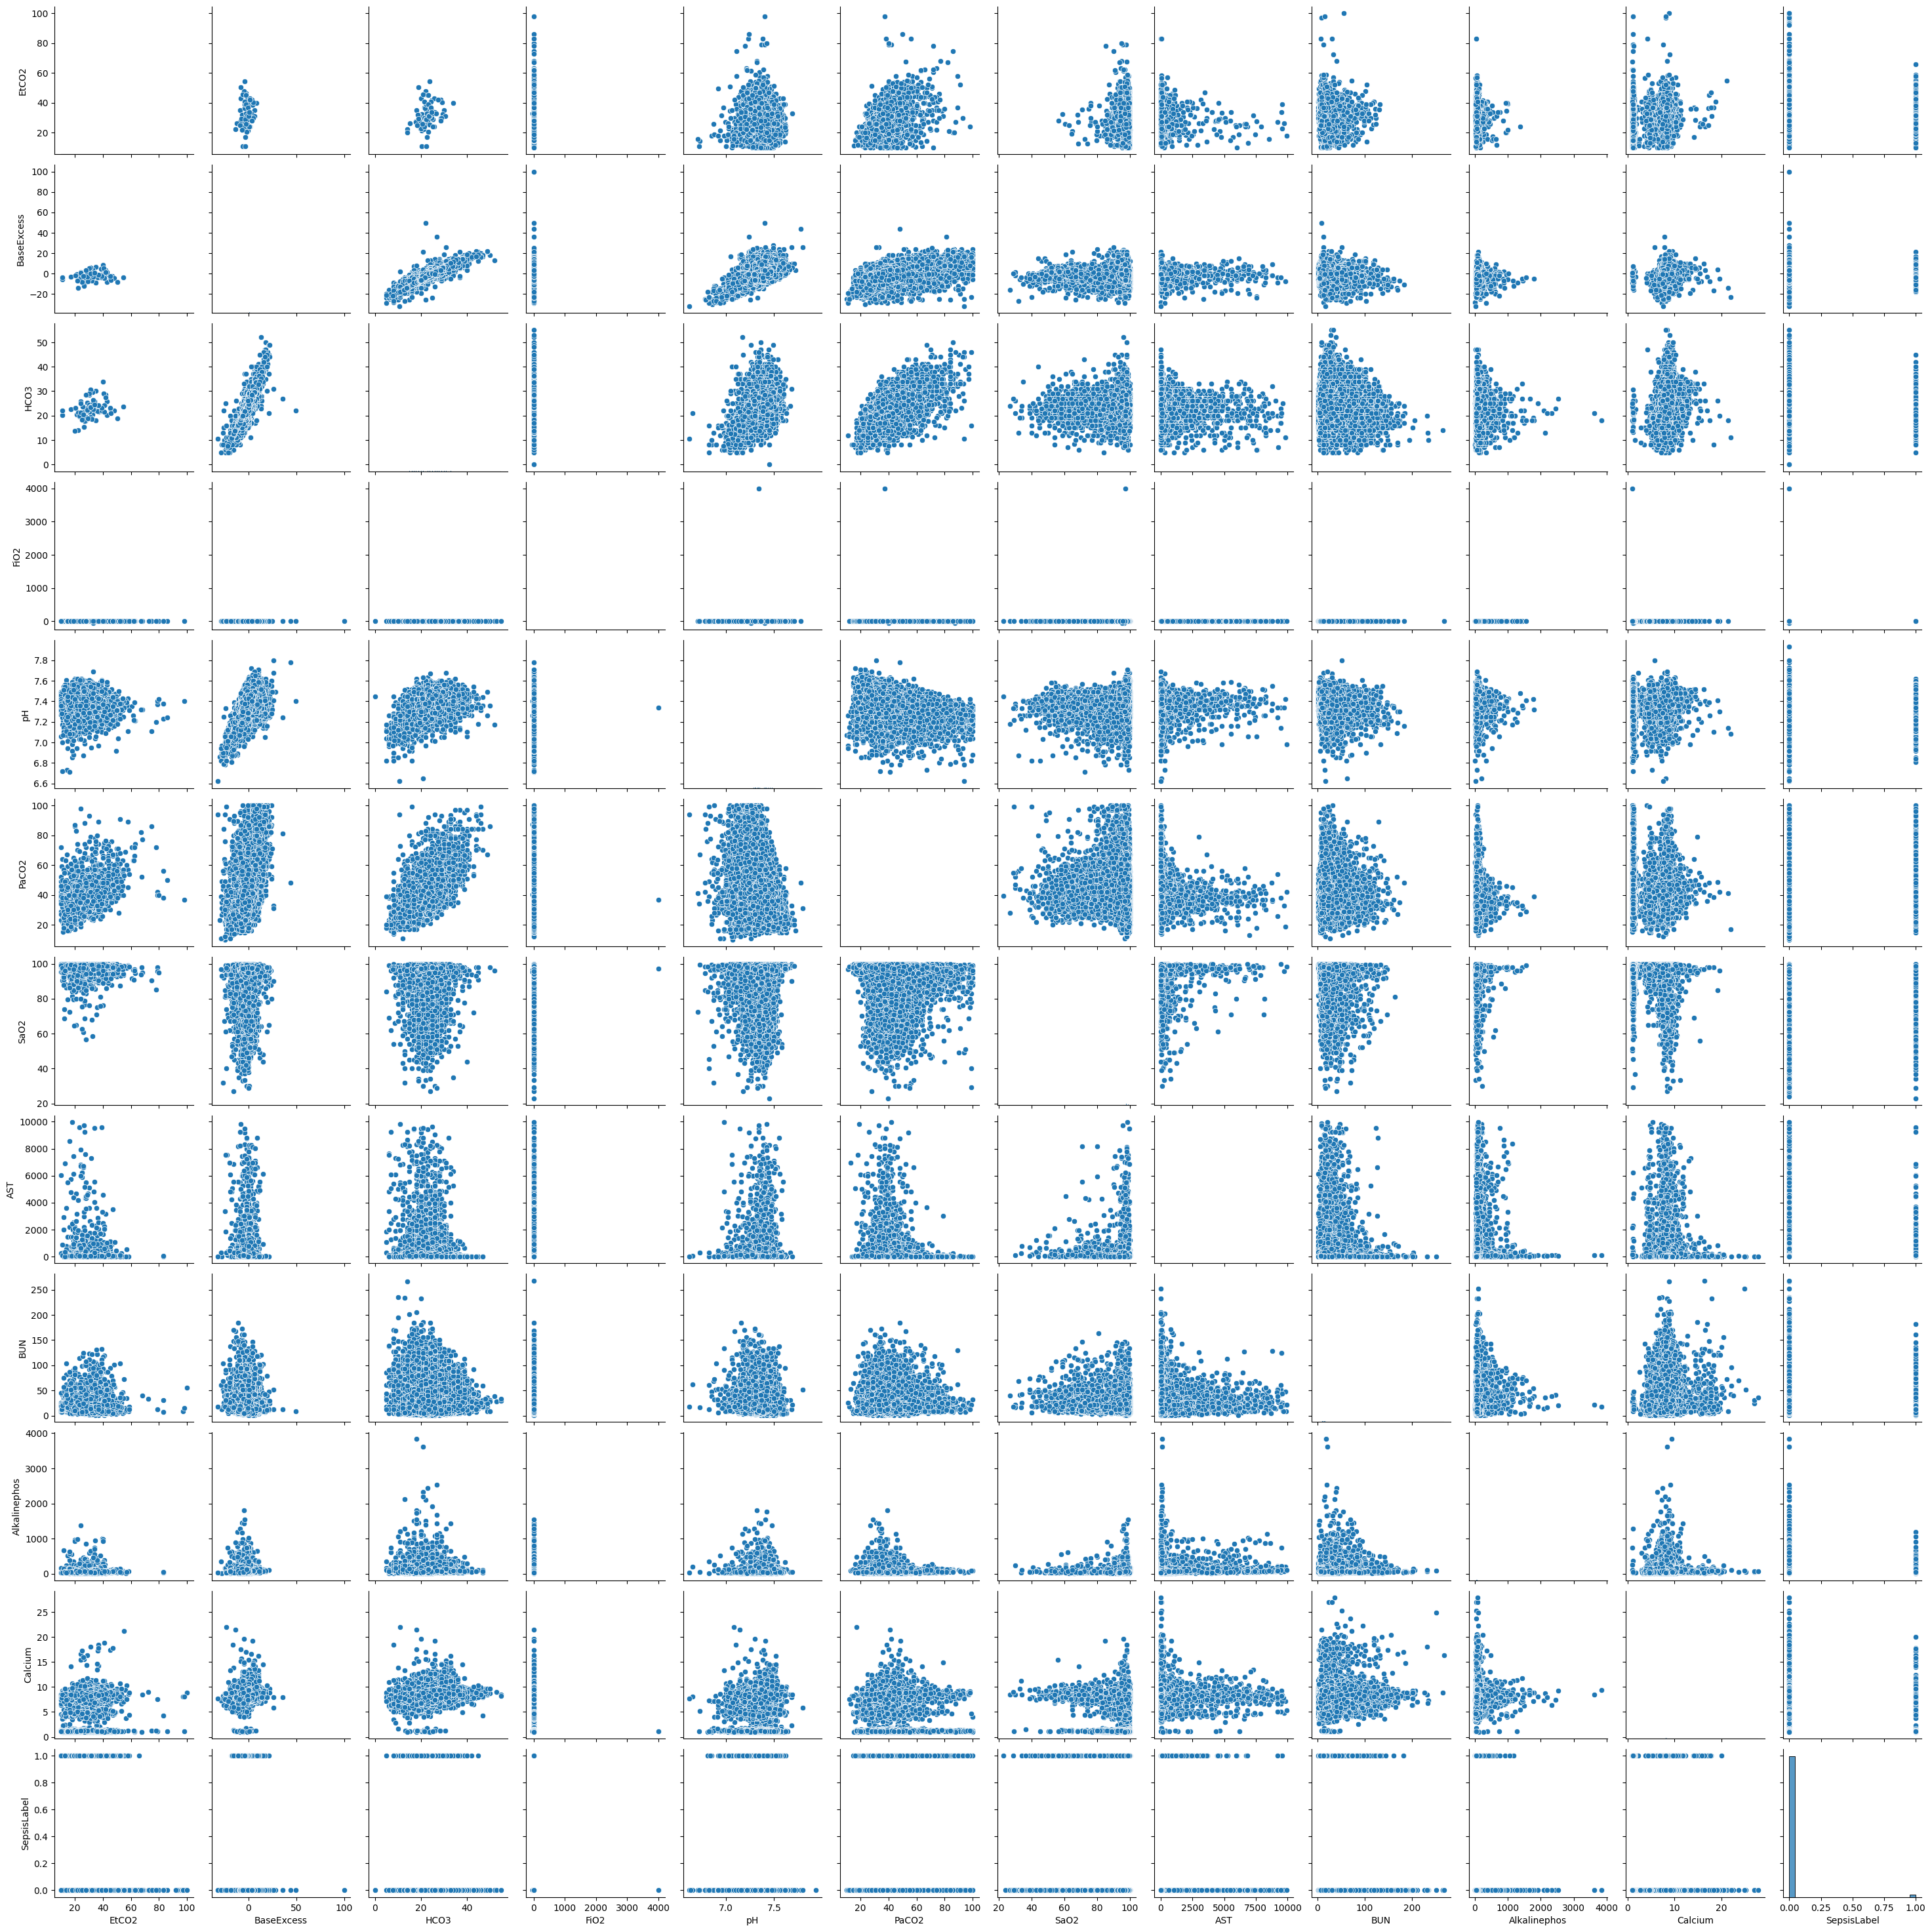

In [7]:
# pair plot extended clinical data v. target - batch 1
b1_range = np.r_[9:20, 42]

ext_clinical_df = get_extended_clinical_with_non_clinical(sepsis_df, b1_range)
vars = ext_clinical_df.columns
sns.pairplot(ext_clinical_df, vars=vars)
plt.show()

In [ ]:
# pair plot extended clinical data v. target - batch 2
b2_range = np.r_[20:35, 42]

ext_clinical_df = get_extended_clinical_with_non_clinical(sepsis_df, b2_range)
vars = ext_clinical_df.columns
sns.pairplot(ext_clinical_df, vars=vars)
plt.show()

### Extended Clinical Variables Pairplot Observations

This pairplot visualizes correlations between our extended clinical variables (those that have sparse readings / high occurance of NaNs) against our target.  The visualization above was split in two batches due to the size.  We are able to observe some correlations between varianbles, and particularly between variables and our target varible.  Here are some of interest:



